## Optimization per Stadsdeel
The aim of this Notebook is to explore the possibiliy to optimize certain subsets of the problem and to reassamble these results to see whether or not this actually helps in obtaining a valid, improved solution. 

### Current situation
The process starts with the normal loading of the data, followed by a calculation of the average distance and penalties as a way to set a baseline. 

In [1]:
import requests
import pandas as pd
import geopandas as gpd

import sys

sys.path.append("../")

from Code.helper_functions import initial_loading, analyze_candidate_solution
from Code.algorithms import random_start_hillclimber
from Code.loading_data import create_all_households

POSTGRES password?WelkomCorne!


In [2]:
all_households, rel_poi_df, joined, df_afstandn2 = initial_loading()

Do you want to use addresses instead of clusters?True
What stadsdeel do you want to make as a subsection (optional parameter)?
API data loaded
DB relation POIs loaded
Table all households created
API and DB joined
containers per cluster determined


..\Code\loading_data.py:239: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verblijfsobjecten['bag'] = verblijfsobjecten['split'].apply(lambda x: x[3]).astype('int64')


distance matrix loaded


In [3]:
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 175.2455230515281
Penalties are: 295.1202834747615


### Modification
This step consists of remvoving all information regarding the configuration of the containers in a certain stadsdeel, optimizing a copy of this and resetting it back into the initial solution to see its impact. The first optimization is done in stadsdeel Zuidoost (T), as it contains the least amount of garbage clusters

In [ ]:
joined_T = joined[joined['stadsdeel'] == 'T']

In [ ]:
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [ ]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

In [ ]:
# Join improved solution back with the rest and calculate score
joined_new = joined[joined['stadsdeel'] != 'T']
joined_new = joined_new.append(best_solution, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined_new, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

### Conclusion
This system of isolating certain stadsdelen appears to be working just fine and can be applied further to be used for multiple (clusters of) stadsdelen. The obvious places for optimization include Zuidoost (T), Noord (N), Nieuw-West(F) and the remaining cluster of Oost (M), Zuidoost(T), West(E) and Centrum(A). This is applied next

### Optimization of Zuid-Oost (T)

In [4]:
joined_T = joined[joined['stadsdeel'] == 'T']
all_households_T  = create_all_households(rel_poi_df, subsectie='T')
all_households_T = all_households_T.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?10
How many iterations hillclimber?100
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 249.6004611676881
Penalties are: 308.1859662117452
Average distance is : 253.887243477501
Penalties are: 331.43696982901037
Average distance is : 258.79049708016
Penalties are: 349.750462283552
Average distance is : 255.35167587973345
Penalties are: 330.5188909842471
Average distance is : 253.34254050443556
Penalties are: 323.0448099165056
Average distance is : 264.58150252659607
Penalties are: 340.2583694579255
Average distance is : 252.57600334192813
Penalties are: 313.7418756889036
Average distance is : 262.1216607408024
Penalties are: 331.08175284827047
Average distance is : 265.93729470100703
Penalties are: 331.4744974089002
Average distance 

Average distance is : 250.86851623361804
Penalties are: 280.0480961641355
280.0480961641355 280.77438737292664
Amount of clusters to change: 7
Average distance is : 251.9518638044225
Penalties are: 284.3734811293575
284.3734811293575 280.0480961641355
Amount of clusters to change: 14
Average distance is : 251.90702614655058
Penalties are: 280.0284169650574
280.0284169650574 280.0480961641355
Amount of clusters to change: 10
Average distance is : 250.15936330911916
Penalties are: 286.1254009960077
286.1254009960077 280.0284169650574
Amount of clusters to change: 9
Average distance is : 251.8292023531181
Penalties are: 279.4764716425896
279.4764716425896 280.0284169650574
Amount of clusters to change: 11
Average distance is : 252.58050386758566
Penalties are: 281.08280044861505
281.08280044861505 279.4764716425896
Amount of clusters to change: 13
Average distance is : 253.03234167648844
Penalties are: 286.30447137506684
286.30447137506684 279.4764716425896
Amount of clusters to change: 1

..\Code\algorithms.py:115: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = str(pd.datetime.now().date()) + '-' + str(pd.datetime.now().hour)


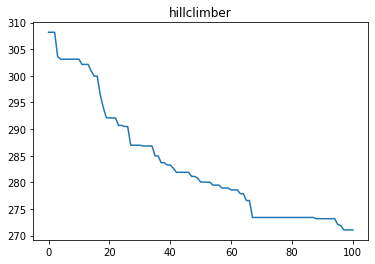

In [5]:
hillclimber_df_T, best_solution_T = random_start_hillclimber(joined_T, all_households_T, rel_poi_df, df_afstandn2)

In [7]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'T']
joined = joined.append(best_solution_T, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 175.2431578810409
Penalties are: 292.64573803203547


### Optimization of Noord (N)

In [35]:
joined_N = joined[joined['stadsdeel'] == 'N']
all_households_N  = create_all_households(rel_poi_df, subsectie='N')
all_households_N = all_households_N.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?0
How many iterations hillclimber?100
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 232.927779701472
Penalties are: 391.2522127674272
***************************************
232.927779701472 391.2522127674272 0
Average distance is : 232.927779701472
Penalties are: 391.2522127674272
Amount of clusters to change: 19
Average distance is : 232.1827253753964
Penalties are: 390.2169842109418
390.2169842109418 391.2522127674272
Amount of clusters to change: 21
Average distance is : 232.21262470065565
Penalties are: 390.56451016420624
390.56451016420624 390.2169842109418
Amount of clusters to change: 13
Average distance is : 232.73401775390673
Penalties are: 389.00433973119124
389.00433973119124 390.2169842109418
Amount of clusters to cha

Average distance is : 234.17358508879983
Penalties are: 359.99916927862654
359.99916927862654 355.0877472436604
Amount of clusters to change: 17
Average distance is : 230.3089598535465
Penalties are: 353.8585719503071
353.8585719503071 355.0877472436604
Amount of clusters to change: 25
Average distance is : 230.48865431469142
Penalties are: 359.12552595881243
359.12552595881243 353.8585719503071
Amount of clusters to change: 20
Average distance is : 230.45957184406606
Penalties are: 355.38412568908484
355.38412568908484 353.8585719503071
Amount of clusters to change: 21
Average distance is : 230.07069241111466
Penalties are: 354.52618391675855
354.52618391675855 353.8585719503071
Amount of clusters to change: 24
Average distance is : 231.34344764604168
Penalties are: 357.7047810974169
357.7047810974169 353.8585719503071
Amount of clusters to change: 19
Average distance is : 231.1796417814723
Penalties are: 356.46426922546857
356.46426922546857 353.8585719503071
Amount of clusters to ch

..\Code\algorithms.py:115: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = str(pd.datetime.now().date()) + '-' + str(pd.datetime.now().hour)


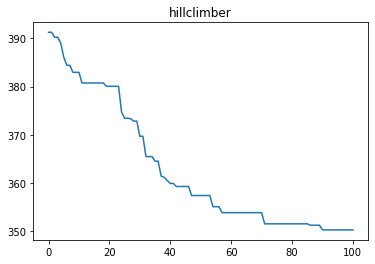

In [36]:
hillclimber_df_N, best_solution_N = random_start_hillclimber(joined_N, all_households_N, rel_poi_df, df_afstandn2)

In [20]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'N']
joined = joined.append(best_solution_N, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 174.96478912756353
Penalties are: 291.79213957198095


### Optimization of Nieuw-West (F)

In [21]:
joined_F = joined[joined['stadsdeel'] == 'F']
all_households_F  = create_all_households(rel_poi_df, subsectie='F')
all_households_F = all_households_F.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

How many random iterations?0
How many iterations hillclimber?100
Do you want the results saved(True/False)?True
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 165.8768689420129
Penalties are: 231.42587110495217
***************************************
165.8768689420129 231.42587110495217 0
Average distance is : 165.8768689420129
Penalties are: 231.42587110495217
Amount of clusters to change: 25
Average distance is : 166.2086271221806
Penalties are: 232.14482359451083
232.14482359451083 231.42587110495217
Amount of clusters to change: 35
Average distance is : 165.00799419113594
Penalties are: 229.26182318070715
229.26182318070715 231.42587110495217
Amount of clusters to change: 30
Average distance is : 164.12864641665203
Penalties are: 226.94924015050907
226.94924015050907 229.26182318070715
Amount of clus

Average distance is : 160.41824749664082
Penalties are: 203.7072110976384
203.7072110976384 200.55373962122525
Amount of clusters to change: 28
Average distance is : 160.87059792180102
Penalties are: 202.94957693862233
202.94957693862233 200.55373962122525
Amount of clusters to change: 31
Average distance is : 160.16143088716288
Penalties are: 201.03738583828937
201.03738583828937 200.55373962122525
Amount of clusters to change: 38
Average distance is : 161.0571656330561
Penalties are: 202.17857063533305
202.17857063533305 200.55373962122525
Amount of clusters to change: 30
Average distance is : 161.14067115691
Penalties are: 203.51407863233058
203.51407863233058 200.55373962122525
Amount of clusters to change: 35
Average distance is : 160.39373429455048
Penalties are: 200.85776213984636
200.85776213984636 200.55373962122525
Amount of clusters to change: 22
Average distance is : 160.44098575322425
Penalties are: 200.00701195219122
200.00701195219122 200.55373962122525
Amount of cluster

..\Code\algorithms.py:115: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  today = str(pd.datetime.now().date()) + '-' + str(pd.datetime.now().hour)


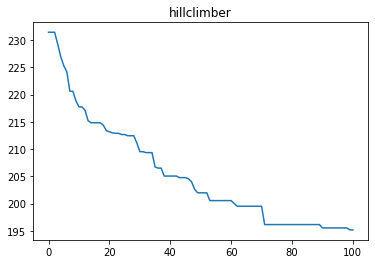

In [23]:
hillclimber_df_F, best_solution_F = random_start_hillclimber(joined_F, all_households_F, rel_poi_df, df_afstandn2)

In [24]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'] != 'F']
joined = joined.append(best_solution_F, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 173.6779149227727
Penalties are: 286.7986314585532


### Optimization of "Centrum"

In [31]:
joined_C = joined[joined['stadsdeel'].isin(['M', 'A', 'K', 'E'])]
all_households_C = create_all_households(rel_poi_df, subsectie = ['M', 'A', 'K', 'E'])
all_households_C = all_households_C.rename(columns={'s1_afv_nodes': 'naar_s1_afv_nodes'})

In [38]:
hillclimber_df_C, best_solution_C = random_start_hillclimber(joined_C, all_households_C, rel_poi_df, df_afstandn2)

How many random iterations?25
How many iterations hillclimber?10
Do you want the results saved(True/False)?False
Do you want to only use a subset of data?True
Do you want to use addresses instead of clusters?True
What parameter to optimize on (score/penalties)?penalties
What method hillclimber(2-opt or Gaussian)?Gaussian
Average distance is : 153.26724970083026
Penalties are: 284.94905064754465
Average distance is : 154.4632232484043
Penalties are: 280.67811943758767
Average distance is : 155.62844131579484
Penalties are: 286.62868339462335
Average distance is : 154.69144793065044
Penalties are: 284.0498486192773
Average distance is : 154.1575309533659
Penalties are: 283.0581752057974
Average distance is : 154.46460181148643
Penalties are: 280.8196735760055
Average distance is : 153.11606638843008
Penalties are: 281.54329334517166
Average distance is : 153.6603016177227
Penalties are: 284.5847426010618
Average distance is : 152.4508940846758
Penalties are: 281.62756727306544
Average di

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [34]:
# Join improved solution back with the rest and calculate score
joined = joined[joined['stadsdeel'].isin(['T', 'N', 'F'])]
joined = joined.append(best_solution_C, ignore_index=True)
joined_cluster_distance, good_result_rich, aansluitingen, avg_distance, penalties = analyze_candidate_solution(joined, all_households, rel_poi_df, df_afstandn2, clean=True, use_count=True)

Average distance is : 172.9807823440298
Penalties are: 274.28097598043263


### Calculation of lower and upper bounds

In [27]:
# Lower bound
joined_cluster_distance = joined.set_index('s1_afv_nodes').join(df_afstandn2.set_index('van_s1_afv_nodes')).reset_index().rename(columns={'index': 'van_s1_afv_nodes'})
joined_cluster_distance = joined_cluster_distance.sort_values(by='afstand')
pivot = joined_cluster_distance.groupby('naar_s1_afv_nodes').first()
lower_bound = (pivot['afstand'] * pivot['count']).sum() / pivot['count'].sum()
lower_bound

113.06252113460441

### Conclusion
Preliminary results show that 